# Modelling

## Classification

### Load Data Set as Pandas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

irisdata = load_iris()
# print description of the dataset
print(irisdata.DESCR)

In [ ]:
# build Pandas dataframe
# for quick summary of data wrangling with pandas, see https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
df = pd.DataFrame(data = irisdata.data, columns = irisdata.feature_names )
df['target'] = irisdata.target
df['targetnames'] = pd.Categorical.from_codes(df["target"], irisdata.target_names)
df


### k-Nearest Neighbour Training & Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split training / test set one (typically you would prefer multiple splitting / cross volidation)
X_train, X_test, y_train, y_test = train_test_split(df[irisdata.feature_names], df["target"], test_size=0.33)
print("No. of Training samples: {}\nNo. of Test samples: {}".format(len(X_train), len(X_test)))

# Training of the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)


No. of Training samples: 100
No. of Test samples: 50


KNeighborsClassifier(n_neighbors=3)

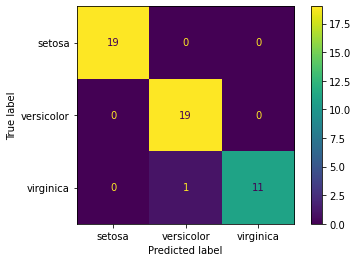

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Testing of the KNN Classifier
y_test_pred = knn_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm, display_labels=irisdata.target_names).plot()

In [ ]:
print(classification_report(y_test, y_test_pred, target_names=irisdata.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.92      0.96        12

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



### SVM Training & Testing with Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

# Training and Cross Validation
svm_classifier = SVC(kernel='rbf', C=1, gamma=0.5)
scores = cross_val_score(svm_classifier, df[irisdata.feature_names], df["target"], cv=10, scoring='accuracy')
# for possible metrics, see https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values

print(scores)
print("Average Score: {}".format(np.mean(scores)))


[1.         0.93333333 1.         1.         0.93333333 1.
 0.93333333 1.         1.         1.        ]
Average Score: 0.9800000000000001


### Random Forest Training & Testing with Cross-Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randforest_classifier = RandomForestClassifier(n_estimators=50, max_depth=3)
scores = cross_val_score(randforest_classifier, df[irisdata.feature_names], df["target"], cv=10, scoring='accuracy')

print(scores)
print("Average Score: {}".format(np.mean(scores)))

[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Average Score: 0.96
